In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/c-Women Notebooks')

import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/c-Women Notebooks')

# importing libraries
import cv2 # OPENCV
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import *

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


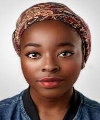

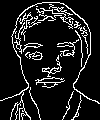

(120, 100)


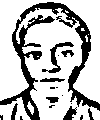

In [54]:
# reading image
img = cv2.imread("face2.jfif")
#print(img.shape)
img = cv2.resize(img, (100,120))
# display image using openCV
cv2_imshow(img)

#edge extraction - apply directly on color image
color_edges = cv2.Canny(img, threshold1=100, threshold2=500) 
cv2_imshow(color_edges)
print(color_edges.shape)

# Edge extraction - convert to grayscale, blur the image, then extract edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converting to grayscale
gray = cv2.medianBlur(gray, 3) # smoothing it out
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
		cv2.THRESH_BINARY, 15 ,15) # detecting the edges

cv2_imshow(edges)




(264, 191, 3)


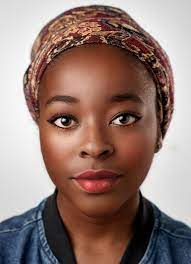

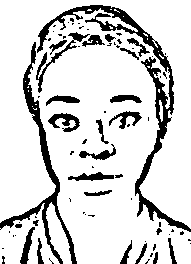

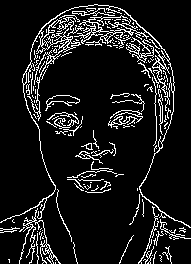

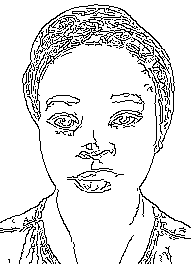

In [39]:

# Edge extraction - convert to grayscale, blur the image, then extract edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
		cv2.THRESH_BINARY, 15 ,15)

cv2_imshow(img)
cv2_imshow(edges)

#edge extraction - apply directly on color image
#color_edges = cv2.Canny(img, threshold1=100, threshold2=200) 
#cv2_imshow(color_edges)

# How to flip the colors??
#print(type(color_edges))
#print(color_edges.shape)
#ce= np.invert(color_edges)
#cv2_imshow(ce)

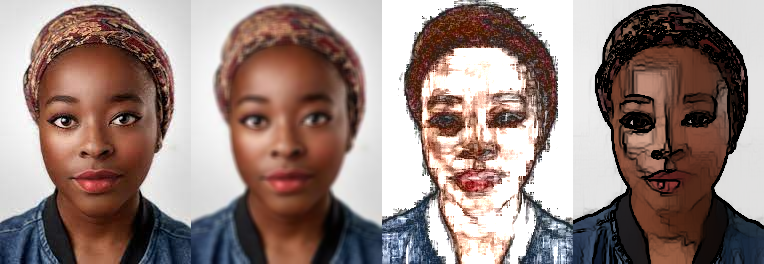

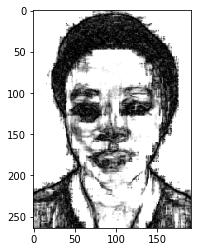

In [63]:

blur = cv2.blur(img,(5,5))
s, sketch = cv2.pencilSketch(img, shade_factor = 0.07)
styled = cv2.stylization(img, sigma_s=100, sigma_r=0.4)

imgDisp = np.concatenate((img, blur, sketch, styled), axis=1)
cv2_imshow(imgDisp)

from matplotlib import pyplot
pyplot.imshow(s, cmap="gray")

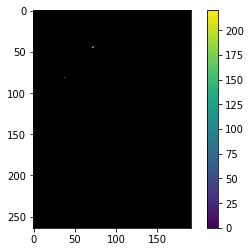

In [64]:
# Background remover

# Let's learn together :
# https://www.geeksforgeeks.org/python-foreground-extraction-in-an-image-using-grabcut-algorithm/

# Python program to illustrate
# foreground extraction using
# GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = img

# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (0, 0, 100, 100)

# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used
cv2.grabCut(image, mask, rectangle,
			backgroundModel, foregroundModel,
			3, cv2.GC_INIT_WITH_RECT)

# In the new mask image, pixels will
# be marked with four flags
# four flags denote the background / foreground
# mask is changed, all the 0 and 2 pixels
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

# The final mask is multiplied with
# the input image to give the segmented image.
image = image * mask2[:, :, np.newaxis]

# output segmented image with colorbar
plt.imshow(image)
plt.colorbar()
plt.show()


In [ ]:
"""
Resources

https://medium.com/analytics-vidhya/computer-vision-and-image-processing-with-opencv-8868876618c3

https://www.geeksforgeeks.org/opencv-python-tutorial/

https://www.analyticsvidhya.com/blog/2021/05/image-processing-using-opencv-with-practical-examples/#:~:text=It%20is%20one%20of%20the,social%20distancing%2C%20and%20many%20more.


"""

In [ ]:
# TASK - detect number of circles in an image! 

# Image link: https://files.liveworksheets.com/def_files/2021/10/6/11006011535264717/11006011535264717001.jpg



5


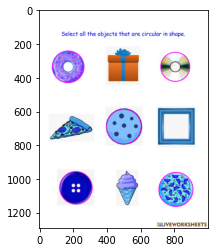

In [117]:
#https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html
import cv2
import numpy as np

# Load image
src = cv2.imread('shapes.jpg', cv2.IMREAD_COLOR)
r,c, ch = src.shape
##print(src.shape)
#src = cv2.resize(src, (int(c/5), int(r/5)))

image = cv2.imread('shapes.jpg', 0)
r,c = image.shape
##print(image.shape)
#image = cv2.resize(image, (int(c/5), int(r/5)))
r,c = image.shape
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, r/16,
                               param1=150, param2=50,
                               minRadius=50, maxRadius=120)
print((circles.shape[1]))
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle outline
            radius = i[2]
            cv2.circle(src, center, radius, (255, 0, 255), 3)

#cv2_imshow(src)
plt.imshow(src, cmap="gray")